## Decision Tree algorithm 
### Dataset 2

In [49]:
import nbimporter

from Helper import * 
%matplotlib inline
random_seed = 42

In [50]:
X_train, X_test, y_train, y_test = import_dataset2()

number of training samples:  2520
number of test samples:  630


In [52]:
param_dist = {"max_depth": np.arange(3,15),
              "splitter": ['best', 'random'],
              "criterion": ["gini", "entropy"],
              'ccp_alpha': [0.0001, 0.001, 0.005, 0.010, 0.015, 0.020, 0.025]}

tree = DecisionTreeClassifier()
tree_cv = RandomizedSearchCV(tree, param_dist, cv=StratifiedKFold(5), scoring='roc_auc')

tree_cv.fit(X_train, y_train)

print('\nBest Score : %.2f'%tree_cv.best_score_, ' Best Params : ', str(tree_cv.best_params_))


Best Score : 0.93  Best Params :  {'splitter': 'best', 'max_depth': 8, 'criterion': 'entropy', 'ccp_alpha': 0.001}


In [53]:
%%time

classifier = DecisionTreeClassifier(**tree_cv.best_params_)
classifier.fit(X_train, y_train)

y_pred_train = classifier.predict(X_train)
y_pred_test = classifier.predict(X_test)


print('training accuracy rate: {}'.format(
    accuracy_score(y_train, y_pred_train)))
print('test accuracy rate: {}'.format(accuracy_score(y_test, y_pred_test)))
print('ROC AUC score: {}'.format(roc_auc_score(y_train, y_pred_train)))

training accuracy rate: 0.957936507936508
test accuracy rate: 0.9428571428571428
ROC AUC score: 0.9093049135422017
CPU times: user 17.2 ms, sys: 2.15 ms, total: 19.3 ms
Wall time: 17.6 ms


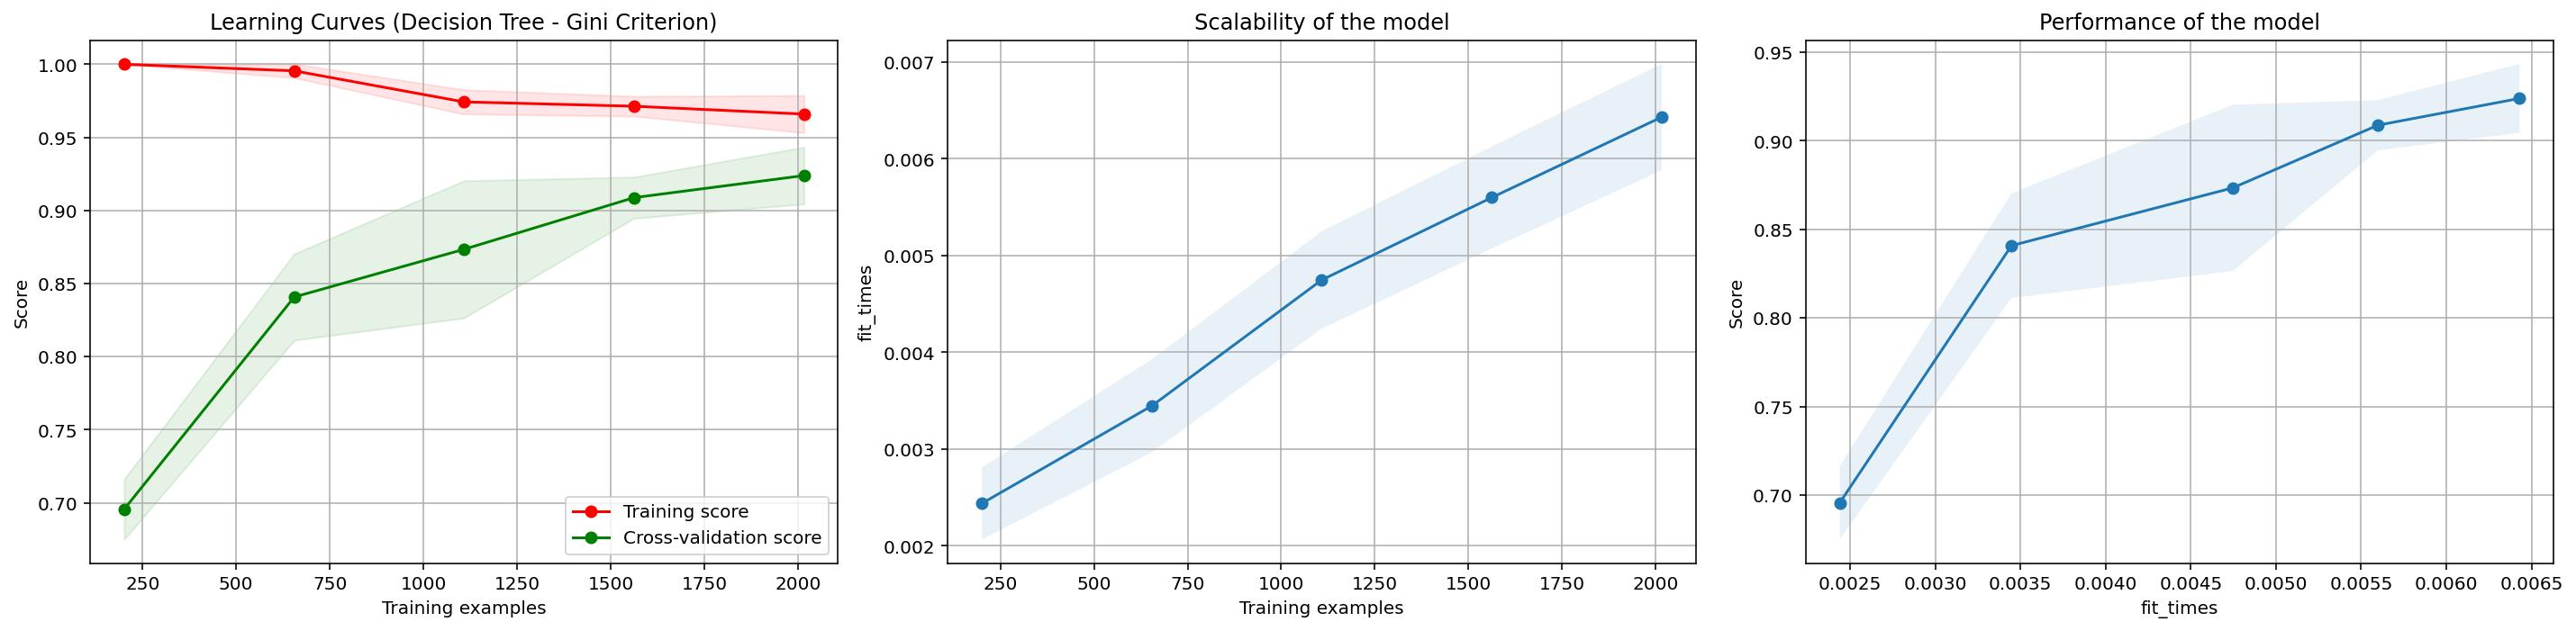

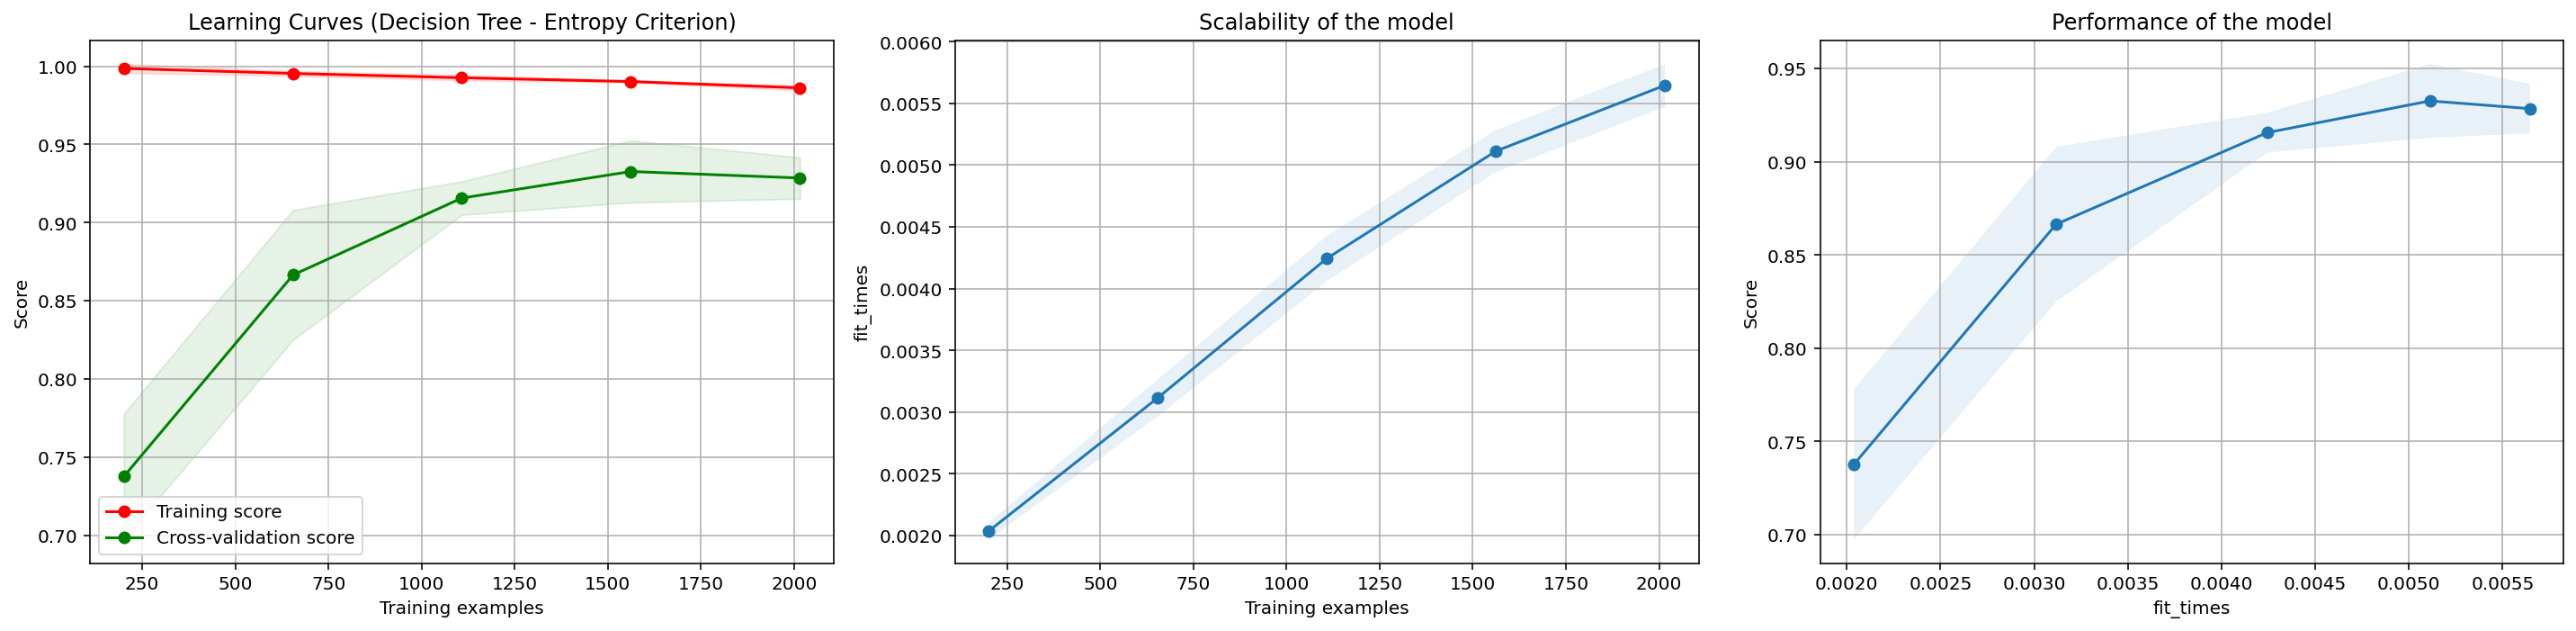

In [59]:
title = "Learning Curves (Decision Tree Training)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.

estimator = DecisionTreeClassifier(criterion='gini', max_depth=8, splitter='best', ccp_alpha=0.001)
estimator1 = DecisionTreeClassifier(criterion='entropy', max_depth=8, splitter='best', ccp_alpha=0.001)

title = "Learning Curves (Decision Tree - Gini Criterion)"
plot_learning_curve(estimator, title, X_train, y_train,cv=StratifiedKFold(5), n_jobs=1)

plt.tight_layout()

title = "Learning Curves (Decision Tree - Entropy Criterion)"
plot_learning_curve(estimator1, title, X_train, y_train,cv=StratifiedKFold(5), n_jobs=1)

plt.tight_layout()

plt.show()

In [101]:
tree_cv.best_params_

{'splitter': 'best',
 'max_depth': 8,
 'criterion': 'entropy',
 'ccp_alpha': 0.001}

In [102]:
np.arange(0.0001, 0.0021, 0.0001)

array([0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008,
       0.0009, 0.001 , 0.0011, 0.0012, 0.0013, 0.0014, 0.0015, 0.0016,
       0.0017, 0.0018, 0.0019, 0.002 ])

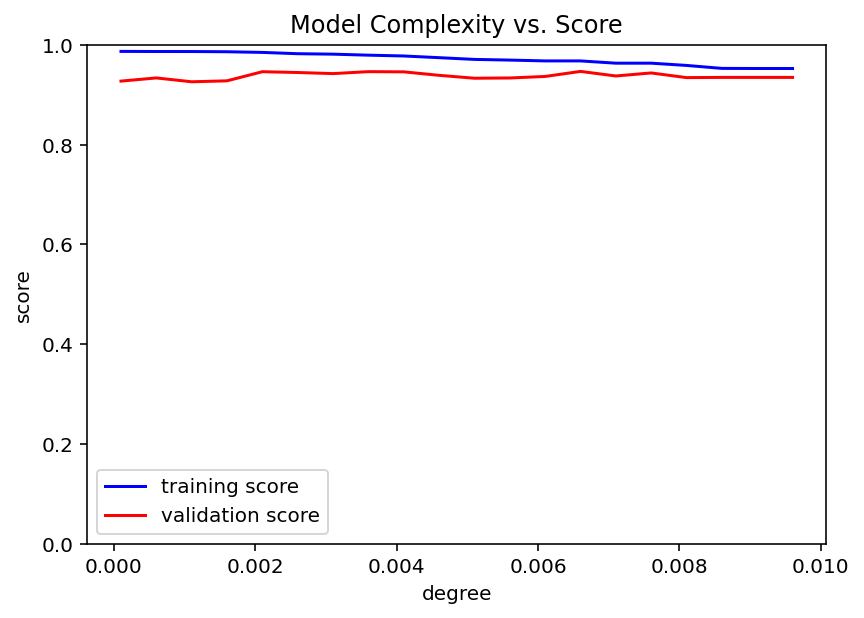

In [103]:
parameter_range = np.arange(0.0001, 0.01, 0.0005)

train_score, val_score = validation_curve(DecisionTreeClassifier(max_depth= 8, criterion='entropy', splitter='best'), X_train, y_train, 
                                          scoring = 'roc_auc',
                                          param_name = 'ccp_alpha', 
                                          param_range = parameter_range,
                                          cv=StratifiedKFold(5))

plt.plot(parameter_range, np.median(train_score, 1), color='blue', label='training score')
plt.plot(parameter_range, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.tight_layout()
plt.title('Model Complexity vs. Score')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

In [136]:
%%time

classifier = DecisionTreeClassifier(max_depth= 8, criterion='entropy', splitter='best', ccp_alpha=0.003)
classifier.fit(X_train, y_train)

CPU times: user 9.21 ms, sys: 32.9 ms, total: 42.1 ms
Wall time: 104 ms


DecisionTreeClassifier(ccp_alpha=0.003, criterion='entropy', max_depth=8)

In [137]:
%%time

y_pred = classifier.predict(X_test)

CPU times: user 2.83 ms, sys: 5.51 ms, total: 8.34 ms
Wall time: 13.3 ms


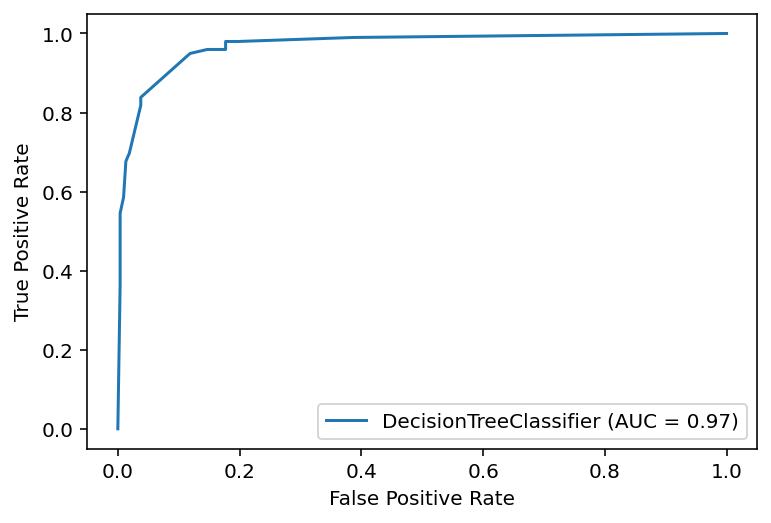

In [135]:
plot_roc_curve(classifier, X_test, y_test);

In [96]:
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()
df_report

,precision,recall,f1-score,support
0,0.943015,0.966102,0.954419,531.000000
1,0.790698,0.686869,0.735135,99.000000
accuracy,0.922222,0.922222,0.922222,0.922222
macro avg,0.866856,0.826485,0.844777,630.000000
weighted avg,0.919079,0.922222,0.919960,630.000000
